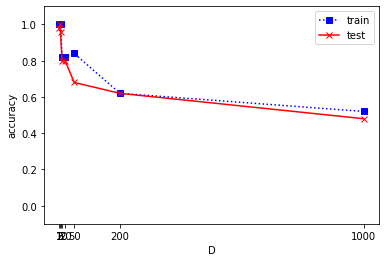

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
# Assignment 1 - k-nearest neighbor
# Machine Learning class: COMP 5630/6630/6630-D01
# Anh Nguyen <anh.ng8@gmail.com>

import numpy as np
import matplotlib.pyplot as plt

try:
    import probml_utils as pml
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml


try:
    from sklearn.neighbors import KNeighborsClassifier as KNN
except ModuleNotFoundError:
    %pip install -qq scikit-learn
    from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score


from sklearn.datasets import make_classification

# measure k-NN accuracy as the number of dimensions increases
Ds = [1, 2, 5, 10,  20, 50, 200, 1000]

train_accuracy_scores = []
test_accuracy_scores = []
k = 10
n_points = 100

for D in Ds:

  # -------- begin generating train and test points and labels
  X, y = make_classification(n_samples = n_points, n_features = D, n_informative = 1, n_redundant = 0, n_clusters_per_class = 1, n_classes = 2, random_state = 42)
  ntrain = n_points // 2

  x_train = X[:ntrain]
  y_train = y[:ntrain]
  x_test = X[ntrain:]
  y_test = y[ntrain:]
  # -------- finish generating train and test points and labels

  # train a k-NN classifier on the above data
  knn = KNN(n_neighbors=k)
  knn.fit(x_train, y_train)
  train_accuracy_scores.append(knn.score(x_train, y_train))
  test_accuracy_scores.append(knn.score(x_test, y_test))

# plotting  
plt.figure()
plt.plot(Ds, train_accuracy_scores, "bs:", label="train")
plt.plot(Ds, test_accuracy_scores, "rx-", label="test")
plt.legend()
plt.xlabel("D")
plt.ylim([-0.1, 1.1])
plt.xticks(Ds)
plt.ylabel("accuracy")
plt.savefig("knnClassifyAccD.pdf")

plt.show()

# Uncomment to save the disk
from google.colab import files
files.download("knnClassifyAccD.pdf") 

